# Introducción a la solución en diferencias finitas de PDEs

## Difusion 1D

Consideremos la ecuacion de difusion uni-dimensional:

$$
\begin{equation}
\frac{\partial u}{\partial t}= \nu \frac{\partial^2 u}{\partial x^2}
\end{equation}
$$

donde $\nu$ es una constante conocida como *coeficiente de difusion*.

### Discretizando derivadas de segundo orden

La derivada de segundo orden puede representarse geometricamente como la linea tangente a la curva dada por la derivada primera. Discretizaremos la derivada de segundo orden empleando un esquema en diferencias centrado. Consideremos la expansion de Taylor de $u_{i+1}$ y $u_{i-1}$ alrededor de $u_i$:

$$
u_{i+1} = u_i + \Delta x \frac{\partial u}{\partial x}\big|_i + \frac{\Delta x^2}{2!} \frac{\partial ^2 u}{\partial x^2}\big|_i + \frac{\Delta x^3}{3!} \frac{\partial ^3 u}{\partial x^3}\big|_i + {\mathcal O}(\Delta x^4)
$$

$$
u_{i-1} = u_i - \Delta x \frac{\partial u}{\partial x}\big|_i + \frac{\Delta x^2}{2!} \frac{\partial ^2 u}{\partial x^2}\big|_i - \frac{\Delta x^3}{3!} \frac{\partial ^3 u}{\partial x^3}\big|_i + {\mathcal O}(\Delta x^4)
$$

Sumando ambas expresiones:

$$
u_{i+1} + u_{i-1} = 2u_i+\Delta x^2 \frac{\partial ^2 u}{\partial x^2}\big|_i + {\mathcal O}(\Delta x^4)
$$

Desestimando terminos de orden igual o mayor a ${\mathcal O}(\Delta x^4)$ y resolviendo para la derivada segunda:

$$
\begin{equation}
\frac{\partial ^2 u}{\partial x^2}=\frac{u_{i+1}-2u_{i}+u_{i-1}}{\Delta x^2} + {\mathcal O}(\Delta x^2)
\end{equation}
$$

La aproximacion en diferencias centradas para la derivada de segundo orden tiene una precision de orden 2.

### De vuelta a la difusion

Escribimos ahora la version discretizada de la ecuacion de difusion 1D:

$$
\begin{equation}
\frac{u_{i}^{n+1}-u_{i}^{n}}{\Delta t}=\nu\frac{u_{i+1}^{n}-2u_{i}^{n}+u_{i-1}^{n}}{\Delta x^2}
\end{equation}
$$

Como antes, notamos que una vez que fijamos la condicion inicial, la unica incognita es $u_{i}^{n+1}$, por lo cual re-arreglamos la ecuacion para aislar este termino:

$$
\begin{equation}
u_{i}^{n+1}=u_{i}^{n}+\frac{\nu\Delta t}{\Delta x^2}(u_{i+1}^{n}-2u_{i}^{n}+u_{i-1}^{n})
\end{equation}
$$

Esta ecuacion discreta nos permite escribir un programa que avance la solucion en tiempo. Para la condicion inicial, continuaremos usando la funcion sombrero (*hat function*). Por lo tanto, en $t=0$: $u=2$ en el intervalo $0.5\le x\le 1$ y $u=1$ en el resto.

### Estabilidad de la ecuacion de difusion

La ecuacion de difusion no esta libre de restricciones en cuanto a la estabilidad numerica de la solucion. Tal como en el caso de la adveccion 1D, hay un conjunto de parametros de discretizacion $\Delta x$ y $\Delta t$ que haran explotar la solucion numerica. Para la ecuacion de difusion y la discretizacion adoptadas aqui, la condicion de estabilidad es:

$$
\begin{equation}
\nu \frac{\Delta t}{\Delta x^2} \leq \frac{1}{2}
\end{equation}
$$

### A resolver!

Esta vez, no permitimos que el usuario fije *cualquier* $\Delta t$; en su lugar, el codigo calcula un valor de $\Delta t$ dentro del rango estable, de acuerdo a la discretizacion espacial adoptada. De esta forma, podremos experimentar con diferentes parametros y la solucion **NO** explotara!

In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [2]:
# Set the font family and size to use for Matplotlib figures.
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

In [3]:
# Set parameters.
nx = 41  # number spatial grid points
L = 2.0  # length of the domain
dx = L / (nx - 1)  # spatial grid size
nu = 0.3  # viscosity
sigma = 0.2  # CFL limit
dt = sigma * dx**2 / nu  # time-step size
nt = 20  # number of time steps to compute

# Get the grid point coordinates.
x = numpy.linspace(0.0, L, num=nx)

# Set the initial conditions.
u0 = numpy.ones(nx)
mask = numpy.where(numpy.logical_and(x >= 0.5, x <= 1.0))
u0[mask] = 2.0

In [4]:
# Integrate in time.
u = u0.copy()
for n in range(nt):
    u[1:-1] = u[1:-1] + nu*dt/dx**2 * (u[2:] - 2*u[1:-1] + u[:-2])

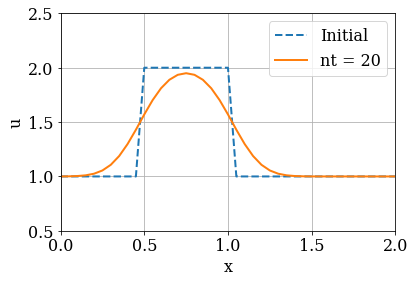

In [5]:
# Plot the solution after nt time steps
# along with the initial conditions.
pyplot.figure(figsize=(6.0, 4.0))
pyplot.xlabel('x')
pyplot.ylabel('u')
pyplot.grid()
pyplot.plot(x, u0, label='Initial',
            color='C0', linestyle='--', linewidth=2)
pyplot.plot(x, u, label='nt = {}'.format(nt),
            color='C1', linestyle='-', linewidth=2)
pyplot.legend(loc='upper right')
pyplot.xlim(0.0, L)
pyplot.ylim(0.5, 2.5);

## Animaciones

En primer lugar, importemos el modulo `animation` de `matplotlib` asi como tambien un metodo de IPython display llamado `HTML`.

In [6]:
from matplotlib import animation
from IPython.display import HTML

Vamos a generar la animacion. En primer lugar, definimos la funcion `diffusion`, la cual calcula la solucion numerica de la ecuacion de difusion 1D al cabo de `nt` pasos de tiempo.

In [7]:
def diffusion(u0, sigma=0.5, nt=20):
    """
    Computes the numerical solution of the 1D diffusion equation
    over the time steps.
    
    Parameters
    ----------
    u0 : numpy.ndarray
        The initial conditions as a 1D array of floats.
    sigma : float, optional
        The value of nu * dt / dx^2;
        default: 0.5.
    nt : integer, optional
        The number of time steps to compute;
        default: 20.
    
    Returns
    -------
    u_hist : list of numpy.ndarray objects
        The history of the numerical solution.
    """
    u_hist = [u0.copy()]
    u = u0.copy()
    for n in range(nt):
        u[1:-1] = u[1:-1] + sigma * (u[2:] - 2 * u[1:-1] + u[:-2])
        u_hist.append(u.copy())
    return u_hist

Ahora invocamos tal funcion para almacenar la historia de la solucion:

In [8]:
# Compute the history of the numerical solution.
u_hist = diffusion(u0, sigma=sigma, nt=nt)

A continuacion, generamos la figura que deseamos animar. Por ahora, la figura contiene la solucion inicial (nuestra funcion *top-hat*).

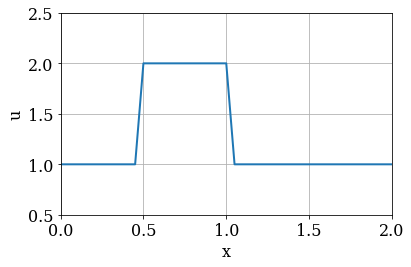

In [9]:
fig = pyplot.figure(figsize=(6.0, 4.0))
pyplot.xlabel('x')
pyplot.ylabel('u')
pyplot.grid()
line = pyplot.plot(x, u0,
                   color='C0', linestyle='-', linewidth=2)[0]
pyplot.xlim(0.0, L)
pyplot.ylim(0.5, 2.5)
fig.tight_layout()

<div class="alert alert-block alert-info">
<b>Note</b>: `pyplot.plot()` can (optionally) return several values. Since we're only creating one line, we ask it for the "zeroth" (and only...) line by adding `[0]` after the `pyplot.plot()` call.
</div>    

Definimos entonces la funcion `update_plot` para actualizar los datos del grafico de acuerdo al indice correspondiente al paso de tiempo.

In [10]:
def update_plot(n, u_hist):
    """
    Update the line y-data of the Matplotlib figure.
    
    Parameters
    ----------
    n : integer
        The time-step index.
    u_hist : list of numpy.ndarray objects
        The history of the numerical solution.
    """
    fig.suptitle('Time step {:0>2}'.format(n))
    line.set_ydata(u_hist[n])

A continuacion, creamos el objeto `animation.FuncAnimation` con los argumentos siguientes:

* `fig`: nombre de la figura,
* `diffusion`: nombre de la funcion (*solver*),
* `frames`: numero de fotogramas,
* `fargs`: argumentos *extra* a pasar a la funcion `diffusion`,
* `interval`: milisegundos para cada fotograma.

In [14]:
# Create an animation.
anim = animation.FuncAnimation(fig, update_plot,
                               frames=nt, fargs=(u_hist),
                               interval=100)

Bien! Ahora empleamos el metodo `HTML` display asi como tambien el metodo `to_jshtml` del objeto de animacion.

In [13]:
# Display the video.
HTML(anim.to_jshtml())

###### The cell below loads the style of the notebook.

In [16]:
from IPython.core.display import HTML
css_file = '.././styles/numericalmoocstyle.css'
HTML(open(css_file, 'r').read())